In [1]:
import  pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\nitin\\OneDrive\\Desktop\\DM_prac\\2010-capitalbikeshare-tripdata.csv")

In [4]:
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


In [5]:
df.isnull().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

In [7]:
df=df.dropna()

In [9]:
df['Start date']=pd.to_datetime(df['Start date'])
df['End date']=pd.to_datetime(df['End date'])


In [11]:
df['hour']=df['Start date'].dt.hour
df['dayofweek']=df['Start date'].dt.dayofweek
df['month']=df['Start date'].dt.month

In [13]:
df['dur_min']=df['Duration']/60

In [14]:
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,hour,dayofweek,month,dur_min
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member,11,0,9,16.866667
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,11,0,9,1.016667
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member,12,0,9,44.833333
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member,12,0,9,23.433333
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member,12,0,9,23.550000


In [18]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['user_class']=le.fit_transform(df['Member type'])

In [19]:
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,hour,dayofweek,month,dur_min,user_class
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member,11,0,9,16.866667,1
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member,11,0,9,1.016667,1
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member,12,0,9,44.833333,1
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member,12,0,9,23.433333,1
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member,12,0,9,23.550000,1


In [22]:
#now remove unecessary data
df=df.drop(['Duration','Start date','End date','Start station','End station','Bike number','Member type'],axis=1)

In [23]:
df.head()

,Start station number,End station number,hour,dayofweek,month,dur_min,user_class
0,31208,31108,11,0,9,16.866667,1
1,31209,31209,11,0,9,1.016667,1
2,31600,31100,12,0,9,44.833333,1
3,31600,31602,12,0,9,23.433333,1
4,31100,31201,12,0,9,23.550000,1


In [25]:
#now feature engineering
x=df.drop(['user_class'],axis=1)
y=df['user_class']

In [26]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,train_size=0.3,random_state=2)

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred=lr.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
print('accuracy: ',accuracy_score(y_test,y_pred))

accuracy:  0.8557428507872167


In [36]:
custom_input = [[31900,31901,15, 4, 7,30]]
custom_input_scaled = sc.transform(custom_input)
prediction = lr.predict(custom_input_scaled)
print("Predicted:", "Subscriber" if prediction[0] == 1 else "Customer")

Predicted: Customer


C:\Users\nitin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat=df.corr()

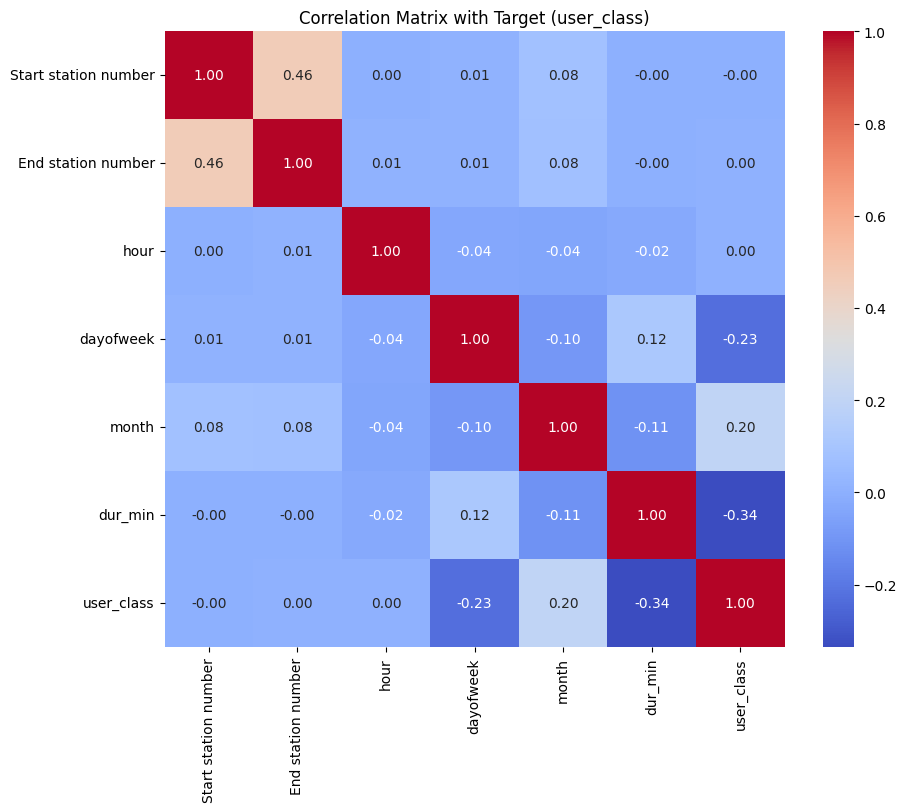

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Target (user_class)")
plt.show()

C:\Users\nitin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nitin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nitin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


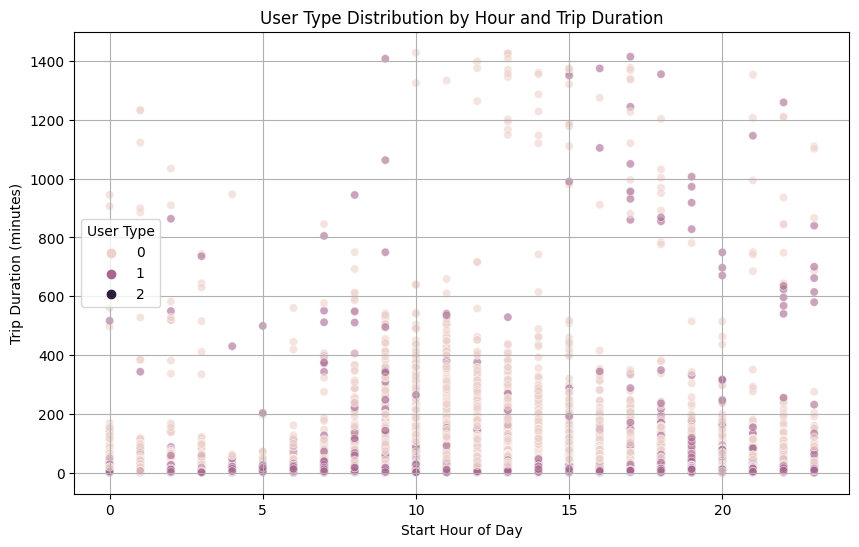

In [48]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='hour', y='dur_min', hue='user_class', alpha=0.6)

plt.title('User Type Distribution by Hour and Trip Duration')
plt.xlabel('Start Hour of Day')
plt.ylabel('Trip Duration (minutes)')
plt.legend(title='User Type')
plt.grid(True)
plt.show()